# Data mining and data visualization- Project
# part 1

# 1.Data info

In [3]:
# imports
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.decomposition import PCA
from datetime import date

In [4]:
print("hello")

hello


In [5]:
# for inline plots in jupyter
%matplotlib inline 

In [6]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [7]:
#reading the data from csv file
df=pd.read_csv("./Marketing_Campaign_Train.csv", index_col=0)
# set the max columns to none
pd.set_option('display.max_columns', None)
print("shape: ", df.shape)
df.head()

shape:  (1680, 28)


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,1.0,1725.0,1.0,1.0,1.0,15.0,0.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,1.0,3.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,18.0,66.0,7.0,12.0,2.0,15.0,0.0,1.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,47.0,181.0,149.0,95.0,95.0,15.0,9.0,6.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,16.0,1622.0,17.0,3.0,4.0,15.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


In [8]:
print(df[['Response_Campaign_1', 'Response_Campaign_2', 'Response_Campaign_3','Response']])

       Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  Response
ID                                                                            
5376                   0.0                  0.0                  0.0         0
6862                   0.0                  0.0                  0.0         0
10749                  0.0                  0.0                  0.0         0
238                    0.0                  0.0                  0.0         0
1501                   0.0                  0.0                  0.0         0
...                    ...                  ...                  ...       ...
8278                   NaN                  NaN                  NaN         0
7458                   0.0                  0.0                  0.0         0
4128                   0.0                  0.0                  0.0         0
5121                   1.0                  0.0                  0.0         0
4954                   0.0                  0.0     

In [9]:
#show all attributes and their type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 5376 to 4954
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1651 non-null   float64
 1   Education              1672 non-null   object 
 2   Status                 1646 non-null   object 
 3   Income                 1609 non-null   float64
 4   Num_of_kids            1672 non-null   float64
 5   Num_of_Teen            1660 non-null   float64
 6   Registration_date      1680 non-null   object 
 7   Recency                1680 non-null   int64  
 8   Mnt_Fruits             1673 non-null   float64
 9   Mnt_Meat               1673 non-null   float64
 10  Mnt_sweet              1659 non-null   float64
 11  Mnt_Wines              1673 non-null   float64
 12  Mnt_Gold_Products      1673 non-null   float64
 13  Mnt_Fish               1673 non-null   float64
 14  Num_Web_Purchases      1651 non-null   float64
 15  N

In [10]:
#defining the target attribute
target = pd.DataFrame(df['Response']) 
data = df.drop('Response', axis=1)

In [11]:
#save all numerical columns
numeric_col = data.describe().columns
numeric_col

Index(['Year_Birth', 'Income', 'Num_of_kids', 'Num_of_Teen', 'Recency',
       'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products',
       'Mnt_Fish', 'Num_Web_Purchases', 'Num_Store_Purchases',
       'Num_Deals_Purchases', 'Num_Catalog_Purchases', 'Num_Web_Visits',
       'Response_Campaign_1', 'Response_Campaign_2', 'Response_Campaign_3',
       'Response_Campaign_4', 'Response_Campaign_5', 'Complain',
       'Cost_Contact', 'Revenue'],
      dtype='object')

In [12]:
#split to nominal and numerical attributes
numeric_data = data[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)
#save all nominal columns 
nominal_col = nominal_data.describe().columns
nominal_col

Index(['Education', 'Status', 'Registration_date'], dtype='object')

# 2.Data statistics

In [13]:
#show attributes and statistics of numerical data
numeric_data.describe()

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
count,1651.000000,1609.000000,1672.000000,1660.000000,1680.000000,1673.000000,1673.000000,1659.000000,1673.000000,1673.000000,1673.000000,1651.000000,1673.000000,1673.000000,1673.000000,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0
mean,1969.047244,51983.554382,0.454545,0.503614,48.890476,303.676031,25.224148,166.232068,35.998207,26.200239,43.646145,2.360388,4.101614,2.650329,5.736402,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0
std,11.937421,26567.679664,0.538492,0.544011,29.091872,340.672889,38.754356,227.583935,52.995401,40.894498,52.753288,1.974469,2.855441,3.022488,3.225084,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.500000,34596.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.500000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,1978.000000,67716.000000,1.000000,1.000000,74.000000,508.000000,30.000000,223.000000,47.000000,32.000000,55.000000,3.000000,6.000000,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0


d:\program files\python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


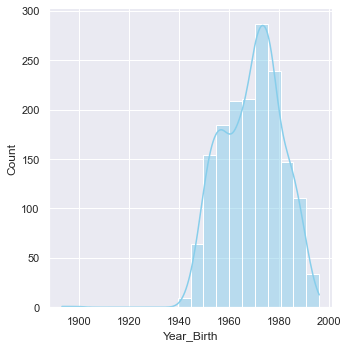

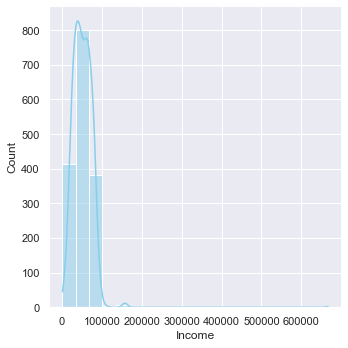

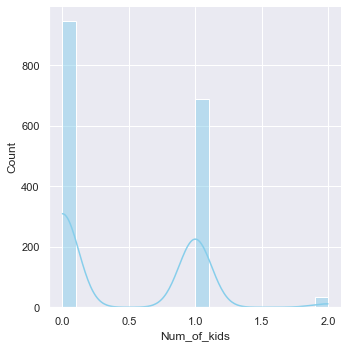

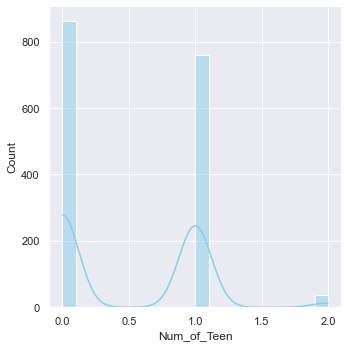

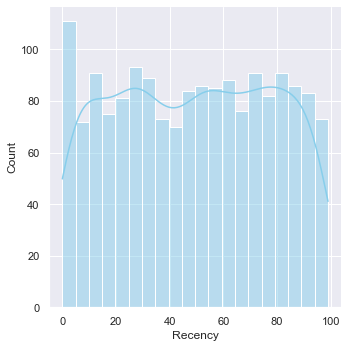

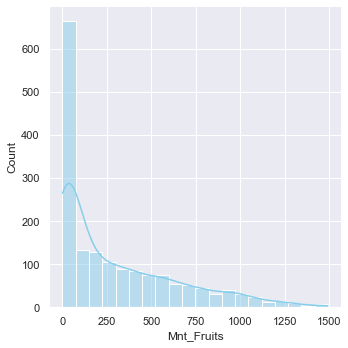

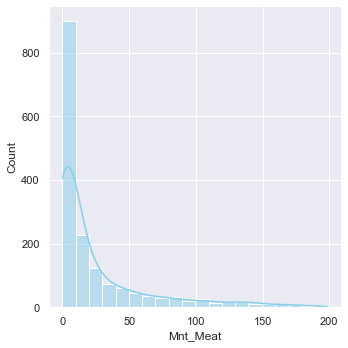

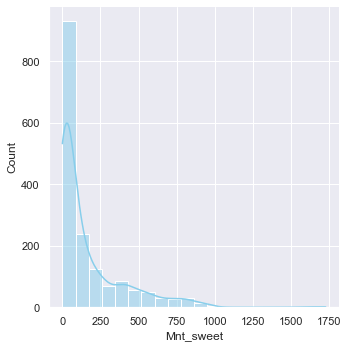

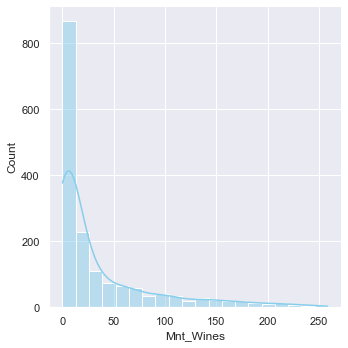

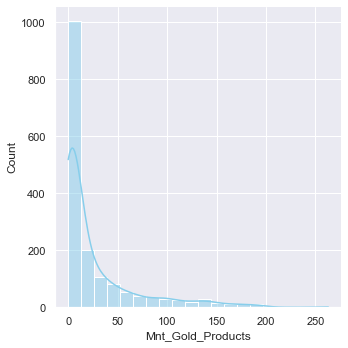

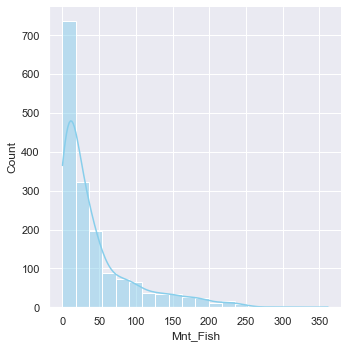

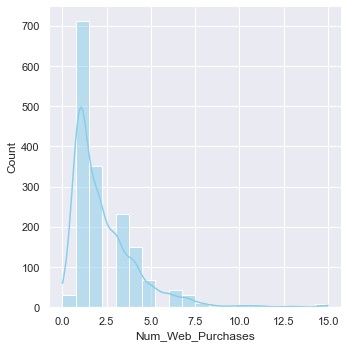

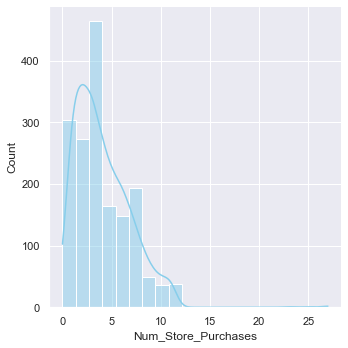

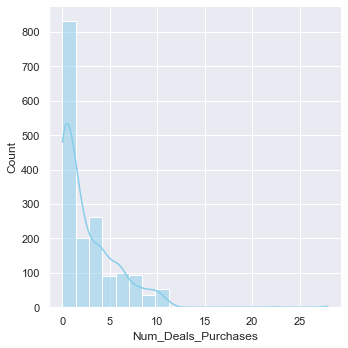

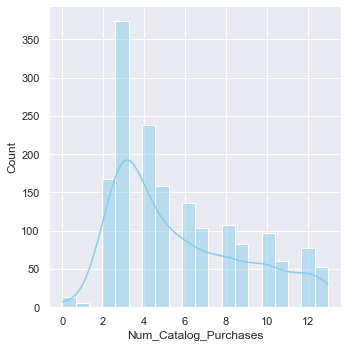

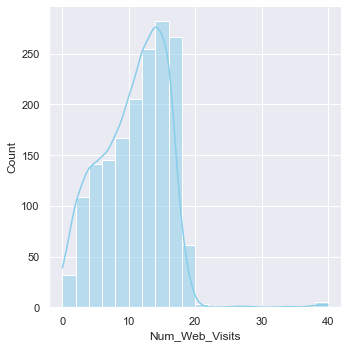

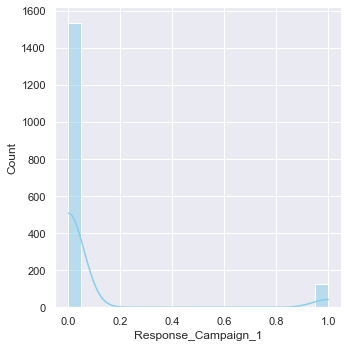

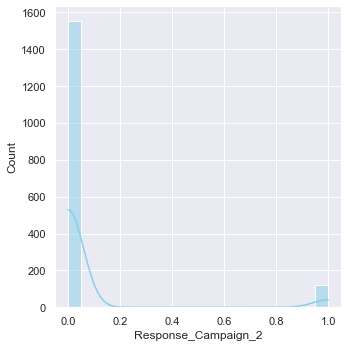

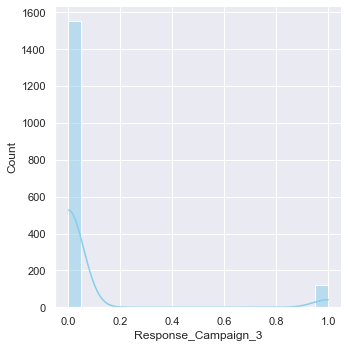

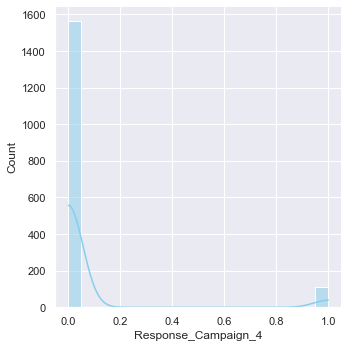

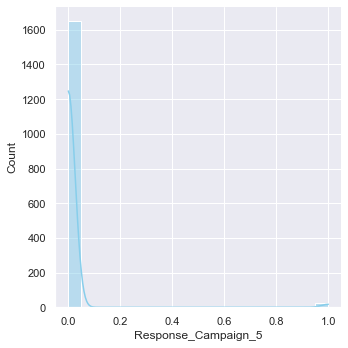

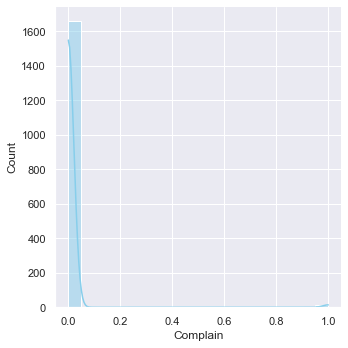

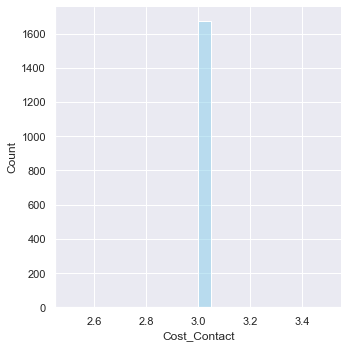

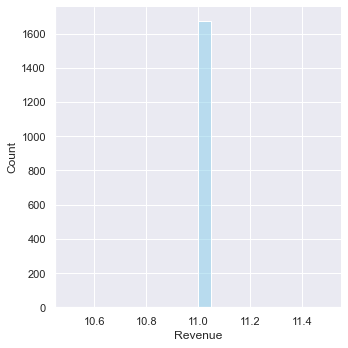

In [14]:
# show distribution of the numeric data:
for col in numeric_col:
    sns.displot(numeric_data[col], bins=20, kde=True, color='skyblue')

In [15]:
#calculate skewness for the numeric columns to check distribution symmetry
skewness= [numeric_data[col].skew(axis=0, skipna=True) for col in numeric_col]
df_skewness=pd.DataFrame({'column' : numeric_col, 'skewness' : skewness})
print(str(df_skewness))

                   column   skewness
0              Year_Birth  -0.352130
1                  Income   7.916831
2             Num_of_kids   0.584131
3             Num_of_Teen   0.412991
4                 Recency  -0.012308
5              Mnt_Fruits   1.182911
6                Mnt_Meat   2.149518
7               Mnt_sweet   2.109214
8               Mnt_Wines   1.988343
9       Mnt_Gold_Products   2.218833
10               Mnt_Fish   1.940249
11      Num_Web_Purchases   2.512555
12    Num_Store_Purchases   1.555273
13    Num_Deals_Purchases   2.065762
14  Num_Catalog_Purchases   0.699794
15         Num_Web_Visits   0.259664
16    Response_Campaign_1   3.191823
17    Response_Campaign_2   3.322458
18    Response_Campaign_3   3.305147
19    Response_Campaign_4   3.527126
20    Response_Campaign_5   8.359327
21               Complain  10.427719
22           Cost_Contact   0.000000
23                Revenue   0.000000


In [16]:
#show the values of  the attributes of the nominal columns
values = [set(nominal_data[col].tolist()) for col in nominal_col]
df_values = pd.DataFrame({'column' : nominal_col,
               'values' : values})
print(str(df_values))

              column                                             values
0          Education    {nan, Master, Graduation, Basic, PhD, 2n Cycle}
1             Status  {Married, nan, Together, Alone, Widow, Divorce...
2  Registration_date  {14/08/2013, 29/11/2012, 19/12/2012, 11/12/201...


In [17]:
#show statistics of nomimal data
describe_df = nominal_data.describe()
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/1680, decimals=3))
describe_df

,Education,Status,Registration_date
count,1672,1646,1680
unique,5,6,634
top,Graduation,Married,14/02/2013
freq,830,653,10
%freq,0.494,0.389,0.006


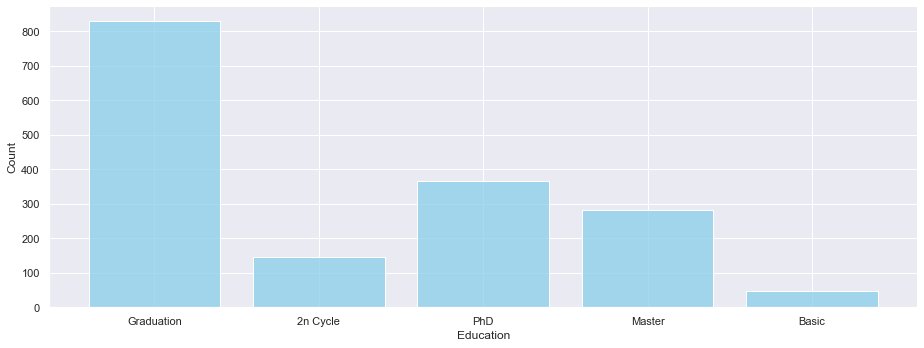

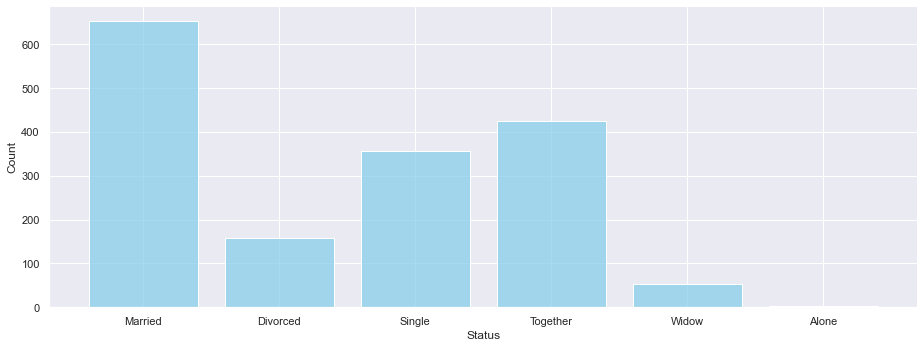

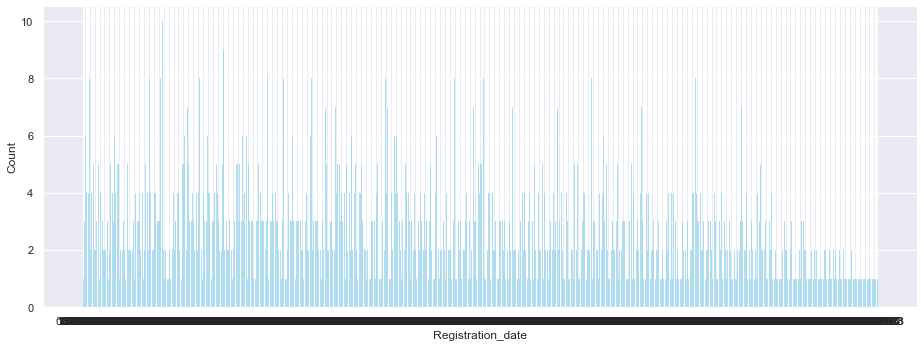

In [18]:
#show distribution in histograms for the catgorial columns 
for col in nominal_col:
    sns.displot(nominal_data, x=col, shrink=.8, color='skyblue', aspect=2.6)

<AxesSubplot:xlabel='Response', ylabel='count'>

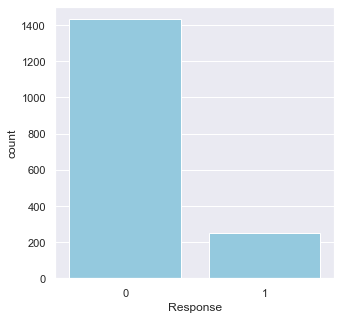

In [19]:
#show distribution in histograms for the target column-"Response"
sns.countplot(x="Response", data=target, color='skyblue')

# 3.Data cleaning

#looking for missing and exceptional values in the columns.





__Year_Birth__

In [20]:
print(sorted(df["Year_Birth"].unique().tolist()))
print(df["Year_Birth"].value_counts())

[1893.0, 1899.0, 1941.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, nan, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0]
1976.0    73
1971.0    66
1978.0    61
1972.0    60
1975.0    59
1973.0    54
1965.0    53
1969.0    52
1970.0    49
1974.0    48
1968.0    44
1956.0    41
1977.0    40
1952.0    39
1963.0    39
1958.0    39
1959.0    37
1979.0    36
1962.0    36
1966.0    36
1955.0    35
1954.0    35
1983.0    35
1982.0    35
1951.0    34
1986.0    34
1957.0    32
1967.0    30
1960.0    30
1980.0    29
1984.0    27
1964.0    27
1981.0    27
1953.0    27
1961.0    24
1989.0    24
1985.0    23
1987.0    23
1949.0    21
1950.0    19
1988.0    18
1948.


__Education:__

In [21]:
print(df["Education"].unique())
print(df["Education"].value_counts())

['Graduation' '2n Cycle' 'PhD' 'Master' 'Basic' nan]
Graduation    830
PhD           366
Master        282
2n Cycle      147
Basic          47
Name: Education, dtype: int64


In [22]:
 #we tried to find correlation between Year_Birth and Education:
pd.crosstab(df['Year_Birth'], df['Education'])

Education,2n Cycle,Basic,Graduation,Master,PhD
Year_Birth,,,,,
1893.0,1,0,0,0,0
1899.0,0,0,0,0,1
1941.0,0,0,0,0,1
1943.0,0,0,0,2,2
1944.0,0,0,2,1,1
1945.0,0,0,0,0,5
1946.0,0,0,2,1,8
1947.0,1,1,1,4,3
1948.0,0,0,3,2,12


__Status:__

In [23]:
print(df["Status"].unique())
print(df["Status"].value_counts())

['Married' 'Divorced' 'Single' 'Together' 'Widow' nan 'Alone']
Married     653
Together    424
Single      356
Divorced    159
Widow        52
Alone         2
Name: Status, dtype: int64


__Income:__

In [24]:
print(sorted(df["Income"].unique().tolist()))
print(df["Income"].value_counts())

[nan, 1730.0, 3502.0, 4023.0, 4428.0, 5305.0, 5648.0, 6560.0, 6835.0, 7144.0, 7500.0, 8028.0, 8820.0, 8940.0, 9255.0, 9548.0, 9722.0, 10245.0, 10979.0, 12393.0, 12571.0, 13084.0, 13533.0, 13624.0, 13724.0, 14045.0, 14188.0, 14421.0, 14515.0, 14661.0, 14906.0, 14918.0, 15033.0, 15038.0, 15056.0, 15253.0, 15287.0, 15315.0, 15345.0, 16005.0, 16185.0, 16248.0, 16269.0, 16529.0, 16531.0, 16581.0, 16626.0, 16653.0, 16813.0, 16927.0, 17003.0, 17148.0, 17256.0, 17345.0, 17459.0, 17487.0, 17649.0, 18169.0, 18227.0, 18351.0, 18358.0, 18393.0, 18492.0, 18589.0, 18690.0, 18701.0, 18746.0, 18890.0, 18929.0, 18978.0, 18988.0, 19107.0, 19329.0, 19346.0, 19419.0, 19444.0, 19485.0, 19510.0, 19514.0, 19789.0, 19986.0, 20130.0, 20180.0, 20193.0, 20194.0, 20425.0, 20427.0, 20491.0, 20587.0, 20895.0, 20981.0, 21024.0, 21059.0, 21063.0, 21255.0, 21282.0, 21355.0, 21474.0, 21645.0, 21675.0, 21840.0, 21846.0, 21888.0, 21955.0, 21994.0, 22010.0, 22108.0, 22123.0, 22148.0, 22212.0, 22263.0, 22280.0, 22304.0, 22

__Num_of_kids:__

In [25]:
print(sorted(df["Num_of_kids"].unique().tolist()))
print(df["Num_of_kids"].value_counts())

[0.0, 1.0, 2.0, nan]
0.0    947
1.0    690
2.0     35
Name: Num_of_kids, dtype: int64


__Num_of_Teen:__

In [26]:
print(sorted(df["Num_of_Teen"].unique().tolist()))
print(df["Num_of_Teen"].value_counts())

[0.0, 1.0, 2.0, nan]
0.0    862
1.0    760
2.0     38
Name: Num_of_Teen, dtype: int64


__Registration_date:__

In [27]:
print(sorted(df["Registration_date"].unique().tolist()))
print(df["Registration_date"].value_counts())

['01/01/2013', '01/01/2014', '01/02/2013', '01/02/2014', '01/03/2014', '01/04/2013', '01/04/2014', '01/05/2013', '01/05/2014', '01/06/2013', '01/07/2013', '01/08/2012', '01/08/2013', '01/09/2012', '01/09/2013', '01/10/2012', '01/10/2013', '01/11/2012', '01/12/2012', '01/12/2013', '02/01/2013', '02/01/2014', '02/02/2013', '02/02/2014', '02/03/2013', '02/03/2014', '02/04/2013', '02/05/2013', '02/05/2014', '02/06/2013', '02/06/2014', '02/07/2013', '02/08/2012', '02/08/2013', '02/09/2012', '02/09/2013', '02/10/2012', '02/10/2013', '02/11/2012', '02/11/2013', '02/12/2012', '02/12/2013', '03/01/2013', '03/01/2014', '03/02/2013', '03/02/2014', '03/03/2013', '03/03/2014', '03/04/2013', '03/04/2014', '03/05/2013', '03/05/2014', '03/06/2013', '03/06/2014', '03/07/2013', '03/08/2012', '03/08/2013', '03/09/2012', '03/10/2013', '03/11/2012', '03/11/2013', '03/12/2012', '04/01/2014', '04/02/2013', '04/02/2014', '04/03/2013', '04/03/2014', '04/04/2014', '04/05/2013', '04/05/2014', '04/06/2013', '04/0

__Recency:__

In [28]:
print(sorted(df["Recency"].unique().tolist()))
print(df["Recency"].value_counts())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
56    30
30    28
2     26
81    24
0     24
      ..
35    10
99    10
66     8
7      7
44     7
Name: Recency, Length: 100, dtype: int64


__Mnt_Fruits:__

In [29]:
print(sorted(df["Mnt_Fruits"].unique().tolist()))
print(df["Mnt_Fruits"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 116.0, 117.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 138.0, 140.0, 141.0, 143.0, 144.0, 145.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 176.0, 177.0,

__Mnt_Meat:__

In [30]:
print(sorted(df["Mnt_Meat"].unique().tolist()))
print(df["Mnt_Meat"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 76.0, 77.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 96.0, 97.0, 98.0, 99.0, 100.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 111.0, 112.0, 114.0, 115.0, 117.0, 120.0, 122.0, 123.0, 124.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 137.0, 138.0, 140.0, 142.0, 143.0, 144.0, 147.0, 148.0, 151.0, 153.0, 154.0, 155.0, 159.0, 160.0, 161.0, 162.0, 163.0, 166.0, 168.0, 169.0, 172.0, 174.0, 178.0, 183.0, 184.0, 185.0, 190.0, 193.0, 194.0, 199.0, nan]
0.0      309
1.0      130
3.0       88
2.0       80
4.0

__Mnt_Gold:__

In [31]:
print(sorted(df["Mnt_sweet"].unique().tolist()))
print(df["Mnt_sweet"].value_counts())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 147.0, 149.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 

__Mnt_Wines__

In [32]:
print(sorted(df["Mnt_Wines"].unique().tolist()))
print(df["Mnt_Wines"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 67.0, 68.0, 69.0, 71.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 89.0, 90.0, 91.0, 93.0, 94.0, 95.0, 97.0, 98.0, 99.0, 101.0, 102.0, 103.0, 104.0, 106.0, 108.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 119.0, 120.0, 121.0, 123.0, 124.0, 125.0, 127.0, 129.0, 130.0, 132.0, 133.0, 134.0, 136.0, 137.0, 138.0, 140.0, 141.0, 142.0, 145.0, 146.0, 147.0, 149.0, 150.0, 151.0, 153.0, 158.0, 159.0, 160.0, 164.0, 166.0, 167.0, 168.0, 169.0, 171.0, 172.0, 173.0, 175.0, 177.0, 179.0, 180.0, 182.0, 184.0, 185.0, 188.0, 189.0, 192.0, 193.0, 194.0, 197.0, 199.0, 201.0, 202.0, 205.0, 207.0, 208.0, 210.0, 212.0, 216.0, 218.0, 2

__Mnt_Gold_Products:__

In [33]:
print(sorted(df["Mnt_Gold_Products"].unique().tolist()))
print(df["Mnt_Gold_Products"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 86.0, 87.0, 88.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 101.0, 102.0, 103.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 129.0, 130.0, 132.0, 133.0, 134.0, 136.0, 137.0, 138.0, 139.0, 141.0, 142.0, 143.0, 144.0, 145.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 156.0, 157.0, 160.0, 161.0, 163.0, 165.0, 166.0, 167.0, 169.0, 172.0, 173.0, 174.0, 175.0, 176.0, 178.0, 179.0, 182.0, 185.0, 187.0,

__Mnt_Fish:__

In [34]:
print(sorted(df["Mnt_Fish"].unique().tolist()))
print(df["Mnt_Fish"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 137.0, 138.0, 139.0, 141.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 158.0, 159.0, 161.0, 162.0, 163.0, 165.0, 166.0, 168.0, 169.0, 170.0, 17

__Num_Web_Purchases:__

In [35]:
print(sorted(df["Num_Web_Purchases"].unique().tolist()))
print(df["Num_Web_Purchases"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 15.0, nan]
1.0     712
2.0     351
3.0     231
4.0     151
5.0      67
6.0      43
7.0      31
0.0      30
8.0      11
15.0      7
11.0      5
10.0      5
13.0      3
9.0       3
12.0      1
Name: Num_Web_Purchases, dtype: int64


__Num_Store_Purchases:__

In [36]:
print(sorted(df["Num_Store_Purchases"].unique().tolist()))
print(df["Num_Store_Purchases"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 23.0, 25.0, 27.0, nan]
2.0     273
1.0     263
3.0     260
4.0     204
5.0     164
6.0     148
7.0     116
8.0      77
9.0      49
0.0      41
11.0     38
10.0     36
27.0      2
25.0      1
23.0      1
Name: Num_Store_Purchases, dtype: int64


__Num_Deals_Purchases:__

In [37]:
print(sorted(df["Num_Deals_Purchases"].unique().tolist()))
print(df["Num_Deals_Purchases"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 22.0, 28.0, nan]
0.0     456
1.0     375
2.0     202
4.0     137
3.0     126
6.0      99
5.0      90
7.0      52
8.0      42
10.0     39
9.0      36
11.0     15
28.0      3
22.0      1
Name: Num_Deals_Purchases, dtype: int64


__Num_Catalog_Purchases:__

In [38]:
print(sorted(df["Num_Catalog_Purchases"].unique().tolist()))
print(df["Num_Catalog_Purchases"].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, nan]
3.0     374
4.0     238
2.0     167
5.0     158
6.0     136
8.0     108
7.0     103
10.0     97
9.0      82
12.0     78
11.0     60
13.0     53
0.0      14
1.0       5
Name: Num_Catalog_Purchases, dtype: int64


__Num_Web_Visits:__

In [39]:
print(sorted(df["Num_Web_Visits"].unique().tolist()))
print(df["Num_Web_Visits"].value_counts())

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 26.0, 28.0, 34.0, 38.0, 40.0, nan]
14.0    282
16.0    266
12.0    254
10.0    205
8.0     166
6.0     144
4.0     138
2.0     108
18.0     61
0.0      32
40.0      3
20.0      3
5.0       3
38.0      2
28.0      1
26.0      1
34.0      1
3.0       1
7.0       1
9.0       1
Name: Num_Web_Visits, dtype: int64


__Response_Campaign_1:__

In [40]:
print(sorted(df["Response_Campaign_1"].unique().tolist()))
print(df["Response_Campaign_1"].value_counts())

[0.0, 1.0, nan]
0.0    1535
1.0     127
Name: Response_Campaign_1, dtype: int64


__Response_Campaign_2:__

In [41]:
print(sorted(df["Response_Campaign_2"].unique().tolist()))
print(df["Response_Campaign_2"].value_counts())

[0.0, 1.0, nan]
0.0    1553
1.0     120
Name: Response_Campaign_2, dtype: int64


__Response_Campaign_3:__

In [42]:
print(sorted(df["Response_Campaign_3"].unique().tolist()))
print(df["Response_Campaign_3"].value_counts())

[0.0, 1.0, nan]
0.0    1552
1.0     121
Name: Response_Campaign_3, dtype: int64


__Response_Campaign_4:__

In [43]:
print(sorted(df["Response_Campaign_4"].unique().tolist()))
print(df["Response_Campaign_4"].value_counts())

[0.0, 1.0, nan]
0.0    1564
1.0     109
Name: Response_Campaign_4, dtype: int64


__Response_Campaign_5:__

In [44]:
print(sorted(df["Response_Campaign_5"].unique().tolist()))
print(df["Response_Campaign_5"].value_counts())

[0.0, 1.0, nan]
0.0    1650
1.0      23
Name: Response_Campaign_5, dtype: int64


__Complain:__

In [45]:
print(sorted(df["Complain"].unique().tolist()))
print(df["Complain"].value_counts())

[0.0, 1.0, nan]
0.0    1658
1.0      15
Name: Complain, dtype: int64


__Cost_Contact:__

In [46]:
print(sorted(df["Cost_Contact"].unique().tolist()))
print(df["Cost_Contact"].value_counts())

[3.0, nan]
3.0    1673
Name: Cost_Contact, dtype: int64


__Revenue:__

In [47]:
print(sorted(df["Revenue"].unique().tolist()))
print(df["Revenue"].value_counts())

[11.0, nan]
11.0    1673
Name: Revenue, dtype: int64


__Response:__

In [48]:
print(sorted(df["Response"].unique().tolist()))
print(df["Response"].value_counts())

[0, 1]
0    1431
1     249
Name: Response, dtype: int64



# 4.Data Transformation

#Normalization and discretization of the data for better data processing

__Year_Birth->Age__

2022
       Year_Birth   Education    Status    Income  Num_of_kids  Num_of_Teen  \
ID                                                                            
5376       1979.0  Graduation   Married       NaN          1.0          0.0   
6862       1971.0  Graduation  Divorced    1730.0          0.0          0.0   
10749      1991.0  Graduation    Single    8028.0          0.0          0.0   
238        1967.0    2n Cycle  Together   67309.0          1.0          1.0   
1501       1982.0         PhD   Married  160803.0          0.0          0.0   
...           ...         ...       ...       ...          ...          ...   
8278       1990.0         PhD   Married   74214.0          0.0          0.0   
7458       1956.0      Master  Together   34941.0          1.0          1.0   
4128       1962.0         PhD  Together   56067.0          0.0          1.0   
5121       1977.0  Graduation    Single   56628.0          0.0          1.0   
4954       1956.0  Graduation   Married   48195

               Age
count  1651.000000
mean     52.952756
std      11.937421
min      26.000000
25%      44.000000
50%      52.000000
75%      62.500000
max     129.000000


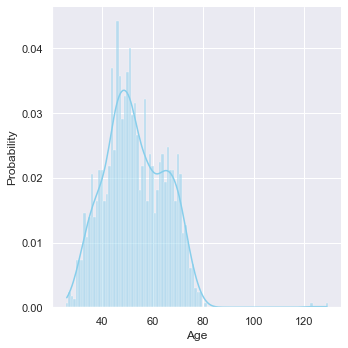

In [120]:
#we decided to add a "Age" column by subtraction "Year_Birth" from the current Year:
todays_date = date.today()
year=todays_date.year
print(year)
Age = []
for value in df['Year_Birth']:
    Age.append(year-value)
df["Age"] = Age
print(df)
#sns.displot(Age, bins=20, kde=True, color='skyblue')
sns.displot(df['Age'], kde=True, color='skyblue', stat="probability", discrete=True )
print (df[["Age"]].describe())

ID
5376    -0.833997
6862    -0.163632
10749   -1.839544
238      0.171550
1501    -1.085384
Name: Age_norm, dtype: float64
           Age_norm
count  1.651000e+03
mean   3.442969e-16
std    1.000303e+00
min   -2.258522e+00
25%   -7.502013e-01
50%   -7.983673e-02
75%    8.000168e-01
max    6.372422e+00


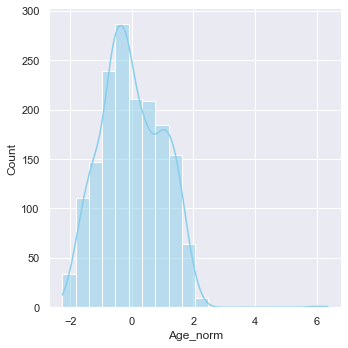

In [50]:
#z-score normalization for the Age column:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['Age']))
df['Age_norm'] = z_scaler.transform(pd.DataFrame(df['Age']))
print(df['Age_norm'].head())
sns.displot(df['Age_norm'], bins=20, kde=True, color='skyblue')
print (df[["Age_norm"]].describe())

In [137]:
#equal-width partitioning for "Age"
A = df['Age_upd'].min()
print(A)
B = df['Age_upd'].max()
print(B)
N = 5
W = np.round((B - A)/N)
W

26.0
129.0


21.0

In [138]:
df.loc[ df['Age'] <= W, 'Age_Bin'] = 0
df.loc[(df['Age'] > W) & (df['Age'] <= 2*W), 'Age_Bin'] = 1
df.loc[(df['Age'] > 2*W) & (df['Age'] <= 3*W), 'Age_Bin'] = 2
df.loc[(df['Age'] > 3*W) & (df['Age'] <= 4*W), 'Age_Bin'] = 3
df.loc[ df['Age'] > 4*W, 'Age_Bin'] = 4

df['Age_Bin'].value_counts()

2.0    983
3.0    374
1.0    321
4.0      2
Name: Age_Bin, dtype: int64

               Age
count  1651.000000
mean     52.952756
std      11.937421
min      26.000000
25%      44.000000
50%      52.000000
75%      62.500000
max     129.000000


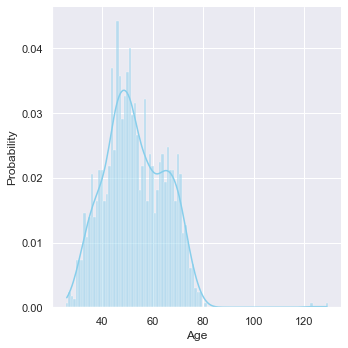

In [53]:
sns.displot(df['Age'], kde=True, color='skyblue', stat="probability", discrete=True )
print (df[["Age"]].describe())

__Income__

In [54]:
#we decided to normalize the Income to 0-1 scale using min-max normalization
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Income']))
df['Income_min_max'] = scaler.transform(pd.DataFrame(df['Income']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Income','Income_min_max']].head()

[1730.]
[666666.]


,Income,Income_min_max
ID,,
5376,NaN,NaN
6862,1730.0,0.000000
10749,8028.0,0.009472
238,67309.0,0.098625
1501,160803.0,0.239231


              Income
count    1609.000000
mean    51983.554382
std     26567.679664
min      1730.000000
25%     34596.000000
50%     50611.000000
75%     67716.000000
max    666666.000000


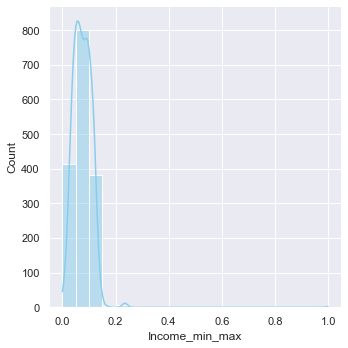

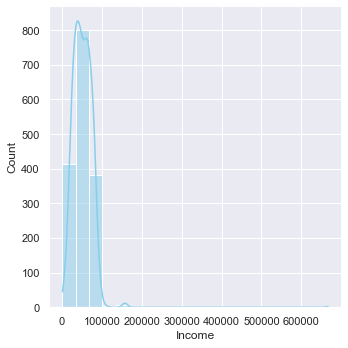

In [131]:
sns.displot(df['Income_min_max'], bins=20, kde=True, color='skyblue')
sns.displot(df['Income'], bins=20, kde=True, color='skyblue')
print (df[["Income"]].describe())

In [140]:
print (df[["Income_min_max"]].describe())

       Income_min_max
count     1609.000000
mean         0.075577
std          0.039955
min          0.000000
25%          0.049427
50%          0.073512
75%          0.099237
max          1.000000


In [135]:
# equal-width partitioning
A = df['Income'].min()
print(A)
B = df['Income'].max()
print(B)
N = 4
W = np.round((B - A)/N)
W

1730.0
666666.0


166234.0

In [57]:
df.loc[ df['Income'] <= W - abs(A), 'Income_Bin'] = 0
df.loc[ df['Income'] <= W, 'Income'] = 0
df.loc[(df['Income'] > W) & (df['Income'] <= 2*W), 'Income_Bin'] = 1
df.loc[(df['Income'] > 2*W) & (df['Income'] <= 3*W), 'Income_Bin'] = 2
df.loc[(df['Income'] > 3*W) & (df['Income'] <= 4*W), 'Income_Bin'] = 3
df.loc[ df['Income'] > 4*W, 'Income'] = 4

df['Income_Bin'].value_counts()

0.0    1602
1.0       6
4.0       1
Name: Income_Bin, dtype: int64


__Mnt_fruits/meat/sweet/wines/gold/fish normalizations:__

[0.]
[1493.]
       Mnt_Fruits_min_max
count         1673.000000
mean             0.203400
std              0.228180
min              0.000000
25%              0.015405
50%              0.111855
75%              0.340255
max              1.000000


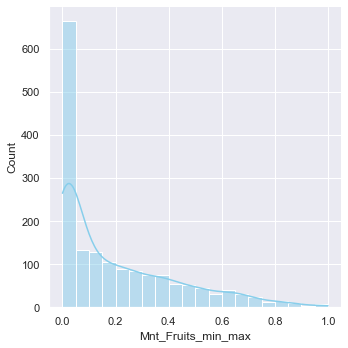

In [58]:
#we decided to normalize all the Mnt catagories to 0-1 scale using min-max normalization
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Mnt_Fruits']))
df['Mnt_Fruits_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_Fruits']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Mnt_Fruits','Mnt_Fruits_min_max']].head()
sns.displot(df['Mnt_Fruits_min_max'], bins=20, kde=True, color='skyblue')
print (df[["Mnt_Fruits_min_max"]].describe())

[0.]
[199.]
       Mnt_Meat_min_max
count       1673.000000
mean           0.126755
std            0.194746
min            0.000000
25%            0.005025
50%            0.040201
75%            0.150754
max            1.000000


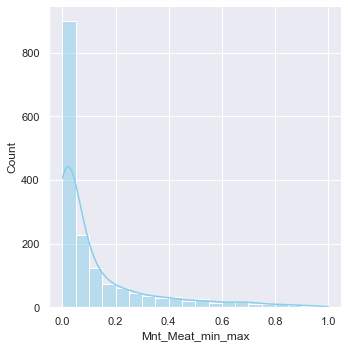

In [59]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Mnt_Meat']))
df['Mnt_Meat_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_Meat']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Mnt_Meat','Mnt_Meat_min_max']].head()
sns.displot(df['Mnt_Meat_min_max'], bins=20, kde=True, color='skyblue')
print (df[["Mnt_Meat_min_max"]].describe())

[1.]
[1725.]
       Mnt_sweet_min_max
count        1659.000000
mean            0.095842
std             0.132009
min             0.000000
25%             0.008411
50%             0.036543
75%             0.128770
max             1.000000


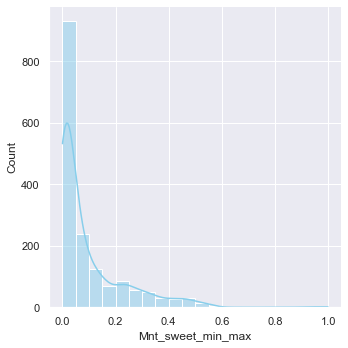

In [60]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Mnt_sweet']))
df['Mnt_sweet_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_sweet']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Mnt_sweet','Mnt_sweet_min_max']].head()
sns.displot(df['Mnt_sweet_min_max'], bins=20, kde=True, color='skyblue')
print (df[["Mnt_sweet_min_max"]].describe())

[0.]
[259.]
       Mnt_Wines_min_max
count        1673.000000
mean            0.138989
std             0.204615
min             0.000000
25%             0.007722
50%             0.046332
75%             0.181467
max             1.000000


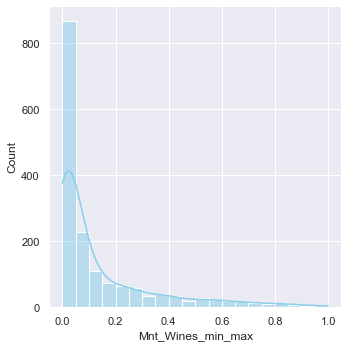

In [61]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Mnt_Wines']))
df['Mnt_Wines_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_Wines']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Mnt_Wines','Mnt_Wines_min_max']].head()
sns.displot(df['Mnt_Wines_min_max'], bins=20, kde=True, color='skyblue')
print (df[["Mnt_Wines_min_max"]].describe())

[0.]
[263.]
       Mnt_Gold_Products_min_max
count                1673.000000
mean                    0.099621
std                     0.155492
min                     0.000000
25%                     0.003802
50%                     0.030418
75%                     0.121673
max                     1.000000


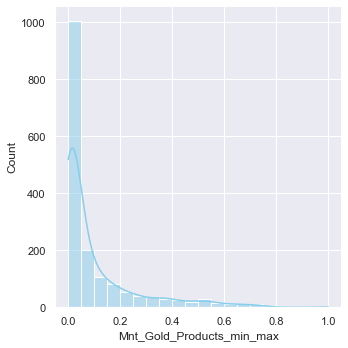

In [62]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Mnt_Gold_Products']))
df['Mnt_Gold_Products_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_Gold_Products']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Mnt_Gold_Products','Mnt_Gold_Products_min_max']].head()
sns.displot(df['Mnt_Gold_Products_min_max'], bins=20, kde=True, color='skyblue')
print (df[["Mnt_Gold_Products_min_max"]].describe())

[0.]
[362.]
       Mnt_Fish_min_max
count       1673.000000
mean           0.120569
std            0.145727
min            0.000000
25%            0.022099
50%            0.066298
75%            0.151934
max            1.000000


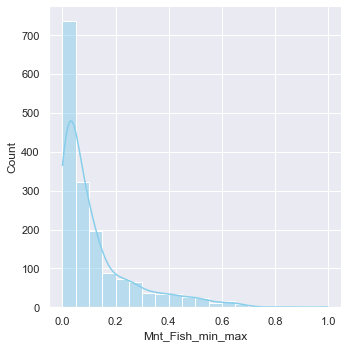

In [63]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Mnt_Fish']))
df['Mnt_Fish_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_Fish']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Mnt_Fish','Mnt_Fish_min_max']].head()
sns.displot(df['Mnt_Fish_min_max'], bins=20, kde=True, color='skyblue')
print (df[["Mnt_Fish_min_max"]].describe())


# 5.Completion of nan values

__Revenue__

In [64]:
df['Revenue_upd'] = df['Revenue']
df['Revenue_upd'] = df['Revenue_upd'].fillna(11.0)
print(df['Revenue_upd'].unique())

[11.]


__Cost_Contact__

In [65]:
df['Cost_Contact_upd'] = df['Cost_Contact']
df['Cost_Contact_upd'] = df['Cost_Contact_upd'].fillna(3.0)
print(df['Cost_Contact_upd'].unique())

[3.]


__Complain__

In [66]:
df['Complain_upd'] = df['Complain']
df['Complain_upd'] = df['Complain_upd'].fillna(0)
print(df['Complain_upd'].unique())

[0. 1.]


__Num_Web_Visits__

In [67]:
df['Num_Web_Visits_upd'] = df['Num_Web_Visits']
df['Num_Web_Visits_upd'] = df['Num_Web_Visits_upd'].fillna(10)
print(df['Num_Web_Visits_upd'].unique())

[ 2. 40. 38. 14.  0. 10. 16.  8. 12. 18.  6.  4. 20. 28. 26. 34.  3.  7.
  9.  5.]


__Age and Age_norm__

In [68]:
df['Age_upd'] = df['Age']
df['Age_upd'] = df['Age_upd'].fillna(53)
print(df['Age_upd'].unique())
df['Age_norm_upd'] = df['Age_norm']
df['Age_norm_upd'] = df['Age_norm_upd'].fillna(3.442969e-16)
print(df['Age_norm_upd'].unique())


[ 43.  51.  31.  55.  40.  49.  59.  66.  46.  65.  73.  68.  48.  52.
  56.  63.  60.  70.  54.  47.  57.  69.  50.  71.  44.  41.  45.  76.
  64.  42.  62.  53.  67.  34.  38.  36.  74.  58.  72.  61.  32.  33.
  39.  30.  37.  35.  79.  77.  75.  78.  29.  28.  27. 123. 129.  26.
  81.]
[-8.33996876e-01 -1.63632298e-01 -1.83954374e+00  1.71549990e-01
 -1.08538359e+00 -3.31223443e-01  5.06732279e-01  1.09330128e+00
 -5.82610159e-01  1.00950571e+00  1.67987029e+00  1.26089243e+00
 -4.15019015e-01 -7.98367263e-02  2.55345563e-01  8.41914568e-01
  5.90527851e-01  1.42848357e+00  8.77544181e-02 -4.98814587e-01
  3.39141135e-01  1.34468800e+00 -2.47427871e-01  1.51227915e+00
 -7.50201304e-01 -1.00158802e+00 -6.66405732e-01  1.93125701e+00
  9.25710140e-01 -9.17792448e-01  7.58118996e-01  3.95884593e-03
  1.17709686e+00 -1.58815703e+00 -1.25297474e+00 -1.42056588e+00
  1.76366586e+00  4.22936707e-01  1.59607472e+00  6.74323423e-01
 -1.75574817e+00 -1.67195260e+00 -1.16917916e+00  3.4429690

__Mnt classes__

In [69]:

df['Mnt_Meat_min_max_upd'] = df['Mnt_Meat_min_max']
df['Mnt_Meat_min_max_upd'] = df['Mnt_Meat_min_max_upd'].fillna(0.126755)
print(df['Mnt_Meat_min_max_upd'].unique())

[0.00502513 0.09045226 0.2361809  0.08040201 0.01005025 0.
 0.14070352 0.03015075 0.10552764 0.04522613 0.11557789 0.07035176
 0.21105528 0.44723618 0.03517588 0.04020101 0.4321608  0.02512563
 0.16582915 0.08542714 0.0201005  0.25628141 0.01507538 0.10050251
 0.18090452 0.26633166 1.         0.06030151 0.1758794  0.29648241
 0.05025126 0.24120603 0.61306533 0.40703518 0.07537688 0.69346734
 0.14572864 0.52261307 0.2160804  0.09547739 0.06532663 0.35678392
 0.12060302 0.15075377 0.40201005 0.63316583 0.29145729 0.30150754
 0.16080402 0.05527638 0.61809045 0.45226131 0.11055276 0.20603015
 0.31155779 0.28140704 0.32663317 0.79899497 0.30653266 0.25125628
 0.13567839 0.64824121 0.71356784 0.42211055 0.4120603  0.36180905
 0.38190955 0.53266332 0.31658291 0.22613065 0.19095477 0.32160804
 0.34673367 0.12562814 0.22110553 0.53768844 0.33668342 0.57788945
 0.44221106 0.17085427 0.20100503 0.15577889 0.68844221 0.27638191
 0.23115578 0.81407035 0.96984925 0.36683417 0.1959799  0.57286432
 0.

_trying to find correlations between columns to fill nan values:_

In [70]:
df['Mnt_Fruits_min_max_upd'] = df['Mnt_Fruits_min_max']
df['Mnt_Fruits_min_max_upd'] = df['Mnt_Fruits_min_max_upd'].fillna( 0.203400)
print(df['Mnt_Fruits_min_max_upd'].unique())

[6.69792364e-04 4.88948426e-02 3.44943068e-01 3.68385800e-02
 1.33958473e-02 3.34896182e-03 1.90890824e-01 3.61018084e-01
 4.01875419e-01 3.28198259e-01 4.90957803e-01 7.36101808e-01
 3.26858674e-01 6.30274615e-01 2.29068989e-01 3.27528466e-01
 1.78834561e-01 2.74614869e-01 2.90020094e-01 4.04554588e-01
 1.54722036e-01 2.09645010e-01 1.54052244e-01 3.21500335e-01
 1.50033490e-01 1.87541862e-01 3.10783657e-01 8.13797723e-01
 2.62558607e-01 4.59477562e-01 3.06095111e-01 2.33757535e-01
 4.29336906e-01 5.16409913e-01 1.80843938e-01 1.03148024e-01
 1.10515740e-01 1.95579370e-01 5.73342264e-01 1.44675151e-01
 1.09176155e-01 4.99665104e-01 1.88211654e-01 2.71935700e-01
 2.53851306e-01 6.60415271e-01 2.19691896e-01 1.11855325e-01
 1.98928332e-01 1.33288681e-01 5.28466175e-01 4.38044206e-01
 4.17280643e-01 1.77494977e-01 6.49698593e-02 2.30408573e-01
 1.94239786e-01 1.53382451e-01 3.07434695e-01 6.00133958e-01
 6.38312123e-01 2.17012726e-01 8.07099799e-01 1.05827194e-01
 5.42531815e-02 1.265907

In [71]:
df['Mnt_sweet_min_max_upd'] = df['Mnt_sweet_min_max']
df['Mnt_sweet_min_max_upd'] = df['Mnt_sweet_min_max_upd'].fillna(0.095842)
print(df['Mnt_sweet_min_max_upd'].unique())

[1.00000000e+00 1.16009281e-03 3.77030162e-02 1.04408353e-01
 9.40255220e-01 9.17053364e-01 0.00000000e+00 1.39791183e-01
 5.22041763e-02 7.36658933e-02 1.06148492e-01 1.03828306e-01
 2.55220418e-02 4.06032483e-02 2.29698376e-01 6.43851508e-02
 8.75870070e-02 1.78654292e-01 3.36426914e-02 3.76450116e-01
 5.74245940e-02 7.88863109e-02 5.97447796e-02 8.99071926e-02
 1.43851508e-01 1.68213457e-02 4.64037123e-02 3.65429234e-02
 8.17865429e-02 6.09048724e-02 4.46635731e-02 3.19025522e-02
 8.87470998e-02 1.50812065e-02 8.46867749e-02 4.40835267e-02
 4.35034803e-02 3.24825986e-02 2.26218097e-02 7.19257541e-02
 4.81438515e-02 5.33642691e-02 9.68677494e-02 7.13457077e-02
 2.49419954e-02 2.14617169e-02 7.65661253e-02 5.27842227e-02
 1.02668213e-01 5.16241299e-02 1.75174014e-01 1.02088167e-01
 8.06264501e-02 2.81902552e-01 1.33410673e-02 5.80046404e-02
 1.07308585e-01 1.35730858e-01 1.27610209e-02 6.49651972e-02
 1.46171694e-01 4.00232019e-02 5.10440835e-02 7.01856148e-02
 1.38051044e-01 1.972157

In [72]:
df['Mnt_Wines_min_max_upd'] = df['Mnt_Wines_min_max']
df['Mnt_Wines_min_max_upd'] = df['Mnt_Wines_min_max_upd'].fillna( 0.138989)
print(df['Mnt_Wines_min_max_upd'].unique())

[0.003861   0.02702703 0.57528958 0.06563707 0.21235521 0.03088803
 0.86100386 0.03861004 0.04633205 0.         0.05791506 0.29343629
 0.07335907 0.06177606 0.01544402 0.02316602 0.31660232 0.28957529
 0.07722008 0.24710425 0.10810811 0.08880309 0.20849421 0.15057915
 0.04247104 0.05019305 0.9034749  0.2972973  0.22393822 0.18146718
 0.21621622 0.8030888  0.34749035 0.09266409 0.01158301 0.23166023
 0.16602317 0.08108108 0.0965251  0.2007722  0.12355212 0.76061776
 0.26254826 0.46332046 0.19305019 0.14671815 0.17374517 0.14285714
 0.11196911 0.25096525 0.3011583  0.13127413 0.18918919 0.16216216
 0.17760618 0.47490347 0.00772201 0.35135135 0.37451737 0.12741313
 0.45945946 0.42471042 0.7027027  0.23938224 0.84942085 0.24324324
 0.1003861  0.35907336 0.13899614 0.52509653 0.32432432 0.59073359
 0.52895753 0.22779923 0.28185328 0.57915058 0.5019305  0.76833977
 0.65250965 0.66409266 0.72972973 0.41698842 0.1969112  0.30888031
 0.31274131 0.4015444  0.58301158 0.44787645 0.39382239 0.6949

In [73]:
df['Mnt_Gold_Products_min_max_upd'] = df['Mnt_Gold_Products_min_max']
df['Mnt_Gold_Products_min_max_upd'] = df['Mnt_Gold_Products_min_max_upd'].fillna(0.099621)
print(df['Mnt_Gold_Products_min_max_upd'].unique())

[0.00380228 0.04562738 0.36121673 0.01140684 0.00760456 0.43346008
 0.02281369 0.57034221 0.10646388 0.07224335 0.         0.22053232
 0.05323194 0.15969582 0.03422053 0.3878327  0.05703422 0.01520913
 0.09125475 0.3269962  0.44106464 0.09885932 0.06463878 0.03802281
 0.0418251  0.03041825 0.07984791 0.08745247 0.01901141 0.11026616
 0.06844106 0.04942966 0.1634981  0.4904943  0.26235741 0.46387833
 0.14828897 0.19011407 0.57414449 0.21292776 0.42585551 0.19391635
 0.02661597 0.30418251 0.17110266 0.33840304 0.121673   0.3460076
 0.46768061 0.39163498 0.11406844 0.27376426 0.37262357 0.18631179
 0.13688213 0.40304183 0.07604563 0.21673004 0.0608365  0.12547529
 0.38403042 0.20152091 0.2851711  0.15209125 0.52471483 0.2661597
 0.23193916 0.1026616  0.08365019 0.17870722 0.73003802 0.09505703
 0.40684411 0.13307985 0.16730038 0.26996198 0.25475285 0.2243346
 0.33079848 0.15589354 0.17490494 0.35361217 0.33460076 0.22813688
 0.35741445 0.59695817 0.14448669 0.18250951 0.68060837 0.2927756

In [74]:
df['Mnt_Fish_min_max_upd'] = df['Mnt_Fish_min_max']
df['Mnt_Fish_min_max_upd'] = df['Mnt_Fish_min_max_upd'].fillna(0.120569)
print(df['Mnt_Fish_min_max_upd'].unique())

[0.00276243 0.00552486 0.26243094 0.01104972 0.37292818 0.2679558
 0.35359116 0.05801105 0.18232044 0.09392265 0.16298343 0.48618785
 0.05248619 0.36464088 0.12154696 0.28176796 0.07734807 0.10773481
 0.3480663  0.16022099 0.39779006 0.02762431 0.07458564 0.19337017
 0.41160221 0.30939227 0.09668508 0.14640884 0.11878453 0.42541436
 0.27348066 0.11325967 0.0718232  0.54972376 0.34530387 0.03038674
 0.02209945 0.32872928 0.27071823 0.29834254 0.30110497 0.4198895
 0.01657459 0.08287293 0.36740331 0.08839779 0.46961326 0.04143646
 0.04696133 0.0801105  0.20165746 0.48066298 0.54696133 0.56629834
 0.04972376 0.17679558 0.10497238 0.19060773 0.01933702 0.01381215
 0.0359116  0.13812155 0.21823204 0.05524862 0.51657459 0.0441989
 0.3839779  0.1160221  0.15745856 0.10220994 0.14917127 0.24585635
 0.24309392 0.33701657 0.03314917 0.25138122 0.21546961 0.22928177
 0.09116022 0.06906077 0.21270718 0.20718232 0.50276243 0.49723757
 0.13535912 0.09944751 0.59392265 0.18508287 0.22651934 0.1104972

In [75]:
pd.crosstab(df['Education'], df['Income'])

Income,1730.0,3502.0,4023.0,4428.0,5305.0,5648.0,6560.0,6835.0,7144.0,7500.0,8028.0,8820.0,8940.0,9255.0,9548.0,9722.0,10245.0,10979.0,12393.0,12571.0,13084.0,13533.0,13624.0,13724.0,14045.0,14188.0,14421.0,14515.0,14661.0,14906.0,14918.0,15033.0,15038.0,15056.0,15253.0,15287.0,15315.0,15345.0,16005.0,16185.0,16248.0,16269.0,16529.0,16531.0,16581.0,16626.0,16653.0,16813.0,16927.0,17003.0,17148.0,17256.0,17345.0,17459.0,17487.0,17649.0,18169.0,18227.0,18351.0,18358.0,18393.0,18492.0,18589.0,18690.0,18701.0,18746.0,18890.0,18929.0,18978.0,18988.0,19107.0,19329.0,19346.0,19419.0,19444.0,19485.0,19510.0,19514.0,19789.0,19986.0,20130.0,20180.0,20193.0,20194.0,20425.0,20427.0,20491.0,20587.0,20895.0,20981.0,21024.0,21059.0,21063.0,21255.0,21282.0,21355.0,21474.0,21645.0,21675.0,21840.0,21846.0,21888.0,21955.0,21994.0,22010.0,22108.0,22123.0,22148.0,22212.0,22263.0,22280.0,22304.0,22327.0,22390.0,22419.0,22448.0,22507.0,22518.0,22554.0,22574.0,22634.0,22669.0,22682.0,22701.0,22775.0,22804.0,22944.0,22979.0,23162.0,23228.0,23272.0,23295.0,23331.0,23477.0,23478.0,23529.0,23536.0,23539.0,23559.0,23616.0,23626.0,23661.0,23763.0,23830.0,23910.0,23957.0,23976.0,24027.0,24072.0,24163.0,24206.0,24221.0,24279.0,24367.0,24401.0,24480.0,24570.0,24594.0,24645.0,24683.0,24711.0,24762.0,24882.0,24884.0,25008.0,25130.0,25224.0,25271.0,25293.0,25315.0,25443.0,25509.0,25545.0,25721.0,25804.0,25930.0,25959.0,25965.0,26067.0,26091.0,26095.0,26150.0,26224.0,26304.0,26326.0,26487.0,26490.0,26518.0,26576.0,26642.0,26646.0,26759.0,26816.0,26850.0,26868.0,26872.0,26877.0,26907.0,26954.0,26997.0,27038.0,27071.0,27100.0,27159.0,27161.0,27203.0,27215.0,27238.0,27242.0,27255.0,27421.0,27469.0,27573.0,27590.0,27683.0,27733.0,27922.0,27943.0,28071.0,28072.0,28087.0,28164.0,28249.0,28320.0,28332.0,28389.0,28420.0,28427.0,28440.0,28442.0,28457.0,28510.0,28520.0,28567.0,28587.0,28691.0,28718.0,28764.0,28769.0,28973.0,29103.0,29187.0,29236.0,29298.0,29315.0,29435.0,29440.0,29478.0,29543.0,29548.0,29604.0,29672.0,29732.0,29760.0,29819.0,29938.0,29999.0,30015.0,30023.0,30096.0,30168.0,30261.0,30279.0,30351.0,30368.0,30372.0,30390.0,30396.0,30467.0,30477.0,30507.0,30523.0,30538.0,30560.0,30630.0,30631.0,30732.0,30753.0,30772.0,30801.0,30822.0,30833.0,30843.0,30899.0,30983.0,30992.0,31056.0,31086.0,31089.0,31158.0,31160.0,31163.0,31353.0,31395.0,31454.0,31497.0,31535.0,31605.0,31615.0,31626.0,31632.0,31686.0,31761.0,31788.0,31859.0,31880.0,31907.0,31928.0,32011.0,32144.0,32146.0,32173.0,32233.0,32300.0,32303.0,32313.0,32414.0,32474.0,32557.0,32583.0,32632.0,32727.0,32880.0,32889.0,32892.0,32952.0,33039.0,33181.0,33228.0,33249.0,33279.0,33316.0,33378.0,33402.0,33419.0,33438.0,33444.0,33454.0,33462.0,33562.0,33569.0,33581.0,33629.0,33697.0,33812.0,33955.0,33986.0,33996.0,34026.0,34043.0,34053.0,34074.0,34109.0,34176.0,34213.0,34230.0,34242.0,34320.0,34350.0,34377.0,34380.0,34412.0,34421.0,34445.0,34469.0,34529.0,34587.0,34596.0,34600.0,34633.0,34704.0,34728.0,34738.0,34824.0,34838.0,34916.0,34935.0,34941.0,35178.0,35196.0,35246.0,35322.0,35340.0,35416.0,35441.0,35523.0,35544.0,35641.0,35684.0,35688.0,35701.0,35788.0,35790.0,35791.0,35860.0,35876.0,35893.0,35924.0,35946.0,36065.0,36075.0,36108.0,36130.0,36230.0,36262.0,36273.0,36283.0,36301.0,36408.0,36443.0,36550.0,36627.0,36634.0,36663.0,36715.0,36732.0,36736.0,36778.0,36781.0,36802.0,36921.0,36927.0,36947.0,36957.0,36959.0,37054.0,37070.0,37085.0,37087.0,37155.0,37235.0,37292.0,37368.0,37395.0,37401.0,37406.0,37509.0,37633.0,37697.0,37717.0,37758.0,37760.0,37787.0,37859.0,37971.0,38136.0,38179.0,38196.0,38197.0,38201.0,38232.0,38236.0,38285.0,38361.0,38410.0,38415.0,38443.0,38452.0,38508.0,38513.0,38547.0,38578.0,38590.0,38593.0,38620.0,38643.0,38680.0,38702.0,38725.0,38741.0,38808.0,38829.0,38853.0,38887.0,38946.0,38961.0,38998.0,39062.0,39146.0,39228.0,39356.0,39548.0,39552.0,39665.0,39763.0,39767.0,39771.0,39791.0,39898.0,39922.0,40101.0,40246.0,40304.0,40344.0,40442.0,40479.0,40521.0,40548.0,40590.0,40637.0,40662.0,4


# 6.Data Reduction

In [76]:
#We choosed the numerical normalized columns without nan values for PCA:
df1 = df[['Response','Age_norm_upd','Mnt_Gold_Products_min_max_upd','Mnt_Fish_min_max_upd','Mnt_Wines_min_max_upd','Mnt_sweet_min_max_upd','Mnt_Fruits_min_max_upd','Mnt_Meat_min_max_upd']]
df1.head()

,Response,Age_norm_upd,Mnt_Gold_Products_min_max_upd,Mnt_Fish_min_max_upd,Mnt_Wines_min_max_upd,Mnt_sweet_min_max_upd,Mnt_Fruits_min_max_upd,Mnt_Meat_min_max_upd
ID,,,,,,,,
5376,0,-0.833997,0.003802,0.002762,0.003861,1.000000,0.000670,0.005025
6862,0,-0.163632,0.003802,0.002762,0.003861,0.001160,0.000670,0.005025
10749,0,-1.839544,0.045627,0.005525,0.027027,0.037703,0.048895,0.090452
238,0,0.171550,0.361217,0.262431,0.575290,0.104408,0.344943,0.236181
1501,0,-1.085384,0.011407,0.011050,0.065637,0.940255,0.036839,0.080402


In [77]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='Response')
df2 = pca.transform(df1)

In [78]:
pca.explained_variance_ratio_

array([0.75558074, 0.11101827, 0.06969282, 0.02420221, 0.01321517,
       0.01149825, 0.00907319, 0.00571935])

In [79]:
df2 = pd.DataFrame(pca.transform(df1))
df2.head()

,0,1,2,3,4,5,6,7
0,-0.840847,-0.099581,0.072877,0.010042,0.075239,-0.196659,0.056972,0.928613
1,-0.174087,-0.303935,-0.169900,-0.045913,0.011327,-0.033968,0.001786,-0.001478
2,-1.845965,-0.219981,-0.044747,-0.004619,0.058378,-0.040086,0.003395,-0.010844
3,0.183555,0.129166,0.482148,-0.118087,-0.218138,-0.006756,0.060291,-0.119757
4,-1.089937,-0.058938,0.141392,-0.004568,0.085874,-0.197086,0.016990,0.842705


# 7.Attributes Correlations

In [80]:
df.to_csv('marketing_campaign_train_new.csv', index=False)

In [139]:
df_update=df.copy()
df_update = df_update.drop(["Year_Birth","Revenue","Cost_Contact","Complain","Num_Web_Visits","Age","Age_norm","Mnt_Fish_min_max",
                     "Mnt_Meat_min_max", "Mnt_Fruits_min_max", "Mnt_sweet_min_max", "Mnt_Wines_min_max", "Mnt_Gold_Products_min_max"],axis=1)
df_update.to_csv('marketing_campaign_train_new2.csv', index=True)

<AxesSubplot:>

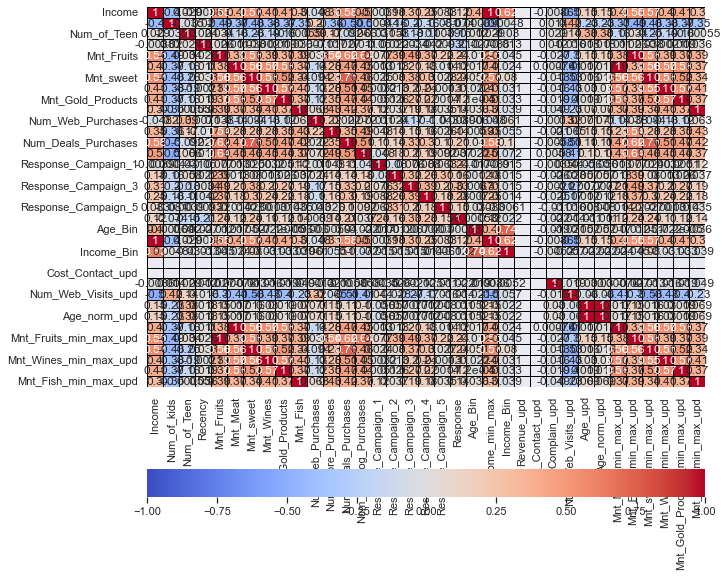

In [82]:
df_update.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10,10))# Sample figsize in inches
sns.heatmap(df_update.corr(), annot = True, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=.5, linecolor='black', cbar_kws= {'orientation': 'horizontal'}, ax=ax)

In [83]:
# Response-Income

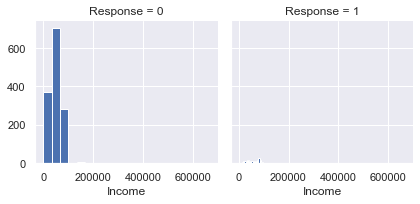

In [84]:
g = sns.FacetGrid(df_update, col='Response')
g.map(plt.hist, 'Income', bins=20)

In [85]:
# Response-Age

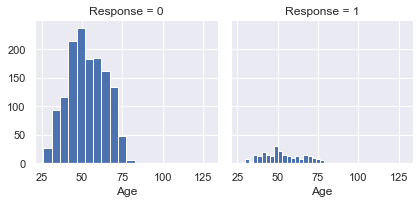

In [86]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Age', bins=20)

In [87]:
# Response-Num_of_kids

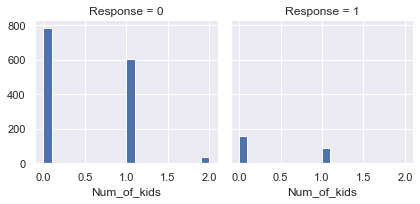

In [88]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_of_kids', bins=20)

In [89]:
# Response-Num_of_Teen

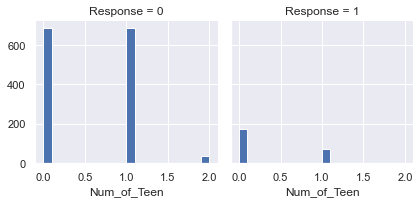

In [90]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_of_Teen', bins=20)

In [91]:
# Response-Mnt_Fruits

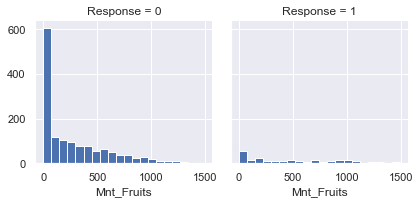

In [92]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_Fruits', bins=20)

In [93]:
# Response-Mnt_Fish

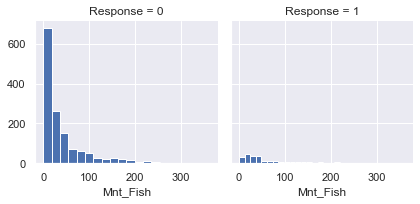

In [94]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_Fish', bins=20)

In [95]:
# Response-Mnt_Meat

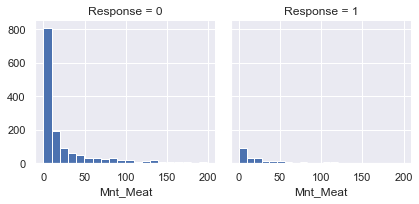

In [96]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_Meat', bins=20)

In [97]:
# Response-Mnt_sweet

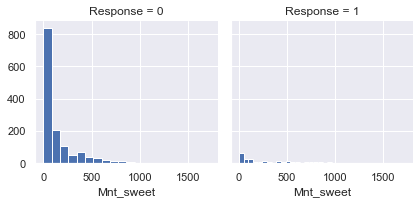

In [98]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_sweet', bins=20)

In [99]:
# Response-Mnt_Wines

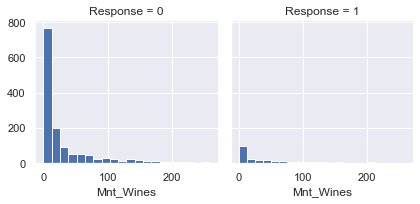

In [100]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_Wines', bins=20)

In [101]:
# Response-Mnt_Gold_Products

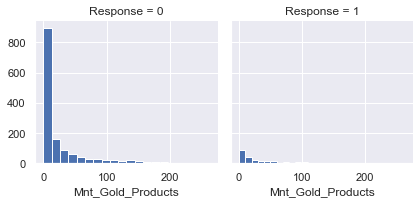

In [102]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_Gold_Products', bins=20)

In [103]:
# Response-Num_Web_Purchases

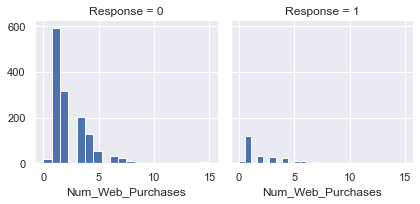

In [104]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_Web_Purchases', bins=20)

In [105]:
# Response-Num_Store_Purchases

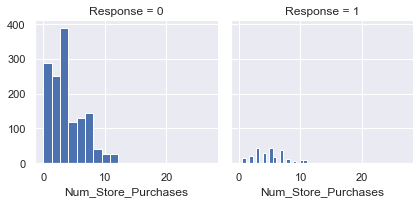

In [106]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_Store_Purchases', bins=20)

In [107]:
# Response-Num_Deals_Purchases

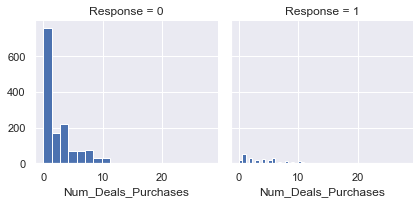

In [108]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_Deals_Purchases', bins=20)

In [109]:
# Response-Num_Catalog_Purchases

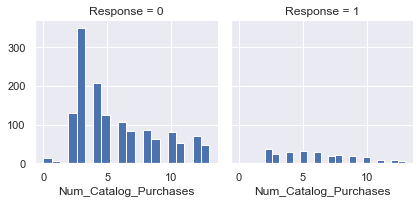

In [110]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_Catalog_Purchases', bins=20)

In [111]:
# Response-Num_Web_Visits

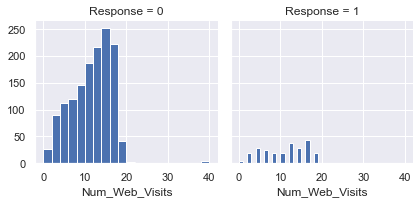

In [112]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_Web_Visits', bins=20)

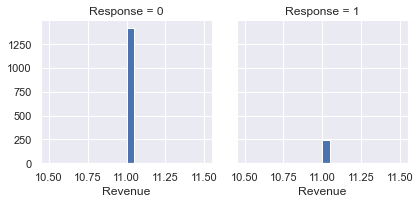

In [113]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Revenue', bins=20)

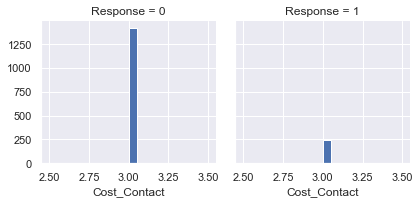

In [114]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Cost_Contact', bins=20)

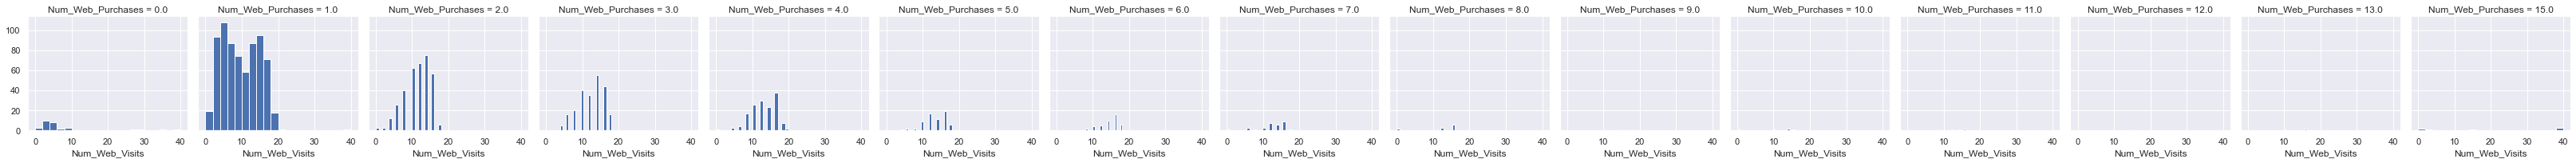

In [115]:
g = sns.FacetGrid(df, col='Num_Web_Purchases')
g.map(plt.hist, 'Num_Web_Visits', bins=20)